In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
X_train= mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

In [4]:
batch_X,batch_Y = mnist.train.next_batch(64)

In [5]:
import tensorflow as tf

In [6]:
hello = tf.constant('Hello Tensorflow!')

In [7]:
sess=tf.Session()
print sess.run(hello)

Hello Tensorflow!


In [8]:
a =tf.constant(2)
b= tf.constant(3)
with tf.Session() as sess:
    print "a: %i" % sess.run(a), "b: %i" % sess.run(b)
    print "Addition with constants: %i" % sess.run(a+b)
    print "Multiplication with constants: %i" % sess.run(a*b) 

a: 2 b: 3
Addition with constants: 5
Multiplication with constants: 6


In [9]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add = tf.add(a,b)
mul = tf.multiply(a,b)

In [10]:
with tf.Session() as sess:
    print "Addition with variables %i" % sess.run(add, feed_dict={a:2,b:3})
    print "Multiplication with variables %i" % sess.run(mul, feed_dict={a:2,b:3})

Addition with variables 5
Multiplication with variables 6


In [11]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])

In [12]:
product = tf.matmul(matrix1, matrix2)

In [22]:
with tf.Session() as sess:
    result = sess.run(product)
    print result

[[ 12.]]


In [14]:
import numpy as np

In [15]:
Xtr,Ytr = mnist.train.next_batch(5000)

In [16]:
Xte,Yte = mnist.test.next_batch(200)

In [17]:
xtr = tf.placeholder("float",[None,784])
xte = tf.placeholder("float",[784])

In [18]:
distance = tf.reduce_sum(tf.abs(tf.add(xtr,tf.negative(xte))), reduction_indices=1)

In [19]:
pred = tf.arg_min(distance, 0)
accuracy = 0.
init = tf.global_variables_initializer()

In [31]:
x=tf.constant([[b1,1,1],[1,1,1]])

In [62]:
Xtr.shape

(5000, 784)

In [55]:
a =tf.constant(3)
with tf.Session() as sess:
    print sess.run(pred,feed_dict={xtr:Xtr,xte:Xte[2,:]})
    #print sess.run(len(Xte))

1316


In [23]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(len(Xte)):
        nn_index = sess.run(pred,feed_dict={xtr:Xtr, xte:Xte[i,:]})
        print "Test", i, "Prediction:", np.argmin(Ytr[[nn_index]]),\
        "True class:", np.argmax(Yte[i])
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print "done"
    print "accuracy:", accuracy

Test 0 Prediction: 0 True class: 7
Test 1 Prediction: 0 True class: 2
Test 2 Prediction: 0 True class: 1
Test 3 Prediction: 1 True class: 0
Test 4 Prediction: 0 True class: 4
Test 5 Prediction: 0 True class: 1
Test 6 Prediction: 0 True class: 4
Test 7 Prediction: 0 True class: 9
Test 8 Prediction: 0 True class: 5
Test 9 Prediction: 0 True class: 9
Test 10 Prediction: 1 True class: 0
Test 11 Prediction: 1 True class: 6
Test 12 Prediction: 0 True class: 9
Test 13 Prediction: 1 True class: 0
Test 14 Prediction: 0 True class: 1
Test 15 Prediction: 0 True class: 5
Test 16 Prediction: 0 True class: 9
Test 17 Prediction: 0 True class: 7
Test 18 Prediction: 0 True class: 3
Test 19 Prediction: 0 True class: 4
Test 20 Prediction: 0 True class: 9
Test 21 Prediction: 0 True class: 6
Test 22 Prediction: 0 True class: 6
Test 23 Prediction: 0 True class: 5
Test 24 Prediction: 0 True class: 4
Test 25 Prediction: 1 True class: 0
Test 26 Prediction: 0 True class: 7
Test 27 Prediction: 0 True class: 4
Te

In [57]:
import matplotlib.pyplot as plt

In [58]:
rng=np.random

In [59]:
learning_rate=0.01
training_epochs=1000
display_step=50

In [60]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221, 2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [73]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(),name="weight")
b = tf.Variable(np.random.randn(),name="bias")

In [74]:
pred = tf.add(tf.multiply(X,W),b)

In [75]:
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [76]:
init = tf.global_variables_initializer()

Epoch: 0050 cost=0.262437880 W= 0.492575 b= -0.931777
Epoch: 0050 cost=0.262163341 W= 0.496521 b= -0.930881
Epoch: 0050 cost=0.262214571 W= 0.497459 b= -0.93071
Epoch: 0050 cost=0.262691200 W= 0.500549 b= -0.93025
Epoch: 0050 cost=0.262184858 W= 0.497106 b= -0.930746
Epoch: 0050 cost=0.262262791 W= 0.498165 b= -0.930492
Epoch: 0050 cost=0.262097597 W= 0.494857 b= -0.930831
Epoch: 0050 cost=0.262099683 W= 0.496557 b= -0.930556
Epoch: 0050 cost=0.262078911 W= 0.495181 b= -0.930737
Epoch: 0050 cost=0.262007356 W= 0.496556 b= -0.930103
Epoch: 0050 cost=0.262085229 W= 0.497634 b= -0.929949
Epoch: 0050 cost=0.262294680 W= 0.491445 b= -0.930523
Epoch: 0050 cost=0.262313634 W= 0.49135 b= -0.930541
Epoch: 0050 cost=0.262401372 W= 0.490904 b= -0.930597
Epoch: 0050 cost=0.262066960 W= 0.492816 b= -0.930258
Epoch: 0050 cost=0.262834489 W= 0.489009 b= -0.930669
Epoch: 0050 cost=0.262429416 W= 0.490313 b= -0.930249
Epoch: 0100 cost=0.241005078 W= 0.478133 b= -0.828691
Epoch: 0100 cost=0.240749702 W=

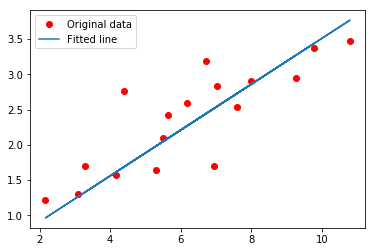

In [80]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(1000):
        for (x,y) in zip (train_X,train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
            if (epoch+1) %50 == 0:
                c = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
                print "Epoch:",'%04d' % (epoch+1), "cost={:.9f}".format(c),\
                "W=",sess.run(W),"b=",sess.run(b)
    print "Optimizatin finished"
    training_cost = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
    print "Training cost=",training_cost, "W=",sess.run(W),"b=",sess.run(b),'\n'
    
    plt.plot(train_X,train_Y,'ro',label='Original data')
    plt.plot(train_X,sess.run(W)*train_X + sess.run(b),label='Fitted line')
    plt.legend()
    plt.show()

In [81]:
# Regression result

In [83]:
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32, [None,10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [84]:
pred = tf.nn.softmax(tf.matmul(x,W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices=1))

In [85]:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [86]:
init = tf.global_variables_initializer()

In [91]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(25):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/100)
        for i in range(total_batch):
            batch_xs,batch_ys= mnist.train.next_batch(total_batch)
            _,c = sess.run([optimizer,cost],feed_dict={x:batch_xs,y:batch_ys})
            avg_cost += c / total_batch
        if (epoch+1) % 1 == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost)
    print "Optimization Finished"
    
    correct_prediction = tf.equal(tf.argmbbax(pred,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print "Accuracy:", accuracy.eval({x:mnist.test.images[:3000],y:mnist.test.labels[:3000]})

Epoch: 0001 cost= 1.182557052
Epoch: 0002 cost= 0.664481427
Epoch: 0003 cost= 0.552245180
Epoch: 0004 cost= 0.498443319
Epoch: 0005 cost= 0.464838493
Epoch: 0006 cost= 0.442337350
Epoch: 0007 cost= 0.425509836
Epoch: 0008 cost= 0.411367112
Epoch: 0009 cost= 0.400994322
Epoch: 0010 cost= 0.391949009
Epoch: 0011 cost= 0.384607156
Epoch: 0012 cost= 0.377845663
Epoch: 0013 cost= 0.371765205
Epoch: 0014 cost= 0.366445094
Epoch: 0015 cost= 0.362732655
Epoch: 0016 cost= 0.357974668
Epoch: 0017 cost= 0.354613680
Epoch: 0018 cost= 0.351272013
Epoch: 0019 cost= 0.347940990
Epoch: 0020 cost= 0.345177150
Epoch: 0021 cost= 0.342402279
Epoch: 0022 cost= 0.339781418
Epoch: 0023 cost= 0.337926834
Epoch: 0024 cost= 0.334914316
Epoch: 0025 cost= 0.333512835
Optimization Finished
Accuracy: 0.889333


In [92]:
n_hidden_1=256
n_hidden_2=256
n_input=784
n_classes=10



In [93]:
x= tf.placeholder("float",[None,n_input])
y= tf.placeholder("float",[None,n_classes])

In [94]:
def multilayer_perceptron(x, weights, biases):
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    return out_layer

In [95]:
weights={
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [96]:
pred = multilayer_perceptron(x,weights,biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
init = tf.global_variables_initializer()

In [97]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(15):
        avg_cost =0
        total_batch = int(mnist.train.num_examples/100)
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(100)
            _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
            avg_cost += c /total_batch
        if epoch % 1 == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=",\
            "{:.9f}".format(avg_cost)
    print 'Optimization Finished'
    
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))
    print "Accuracy:",accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

Epoch: 0001 cost= 150.806635838
Epoch: 0002 cost= 39.552191466
Epoch: 0003 cost= 25.048706896
Epoch: 0004 cost= 18.122025902
Epoch: 0005 cost= 12.714621966
Epoch: 0006 cost= 9.826274027
Epoch: 0007 cost= 6.539884287
Epoch: 0008 cost= 5.704044151
Epoch: 0009 cost= 3.904377537
Epoch: 0010 cost= 2.957406140
Epoch: 0011 cost= 2.255832502
Epoch: 0012 cost= 1.634729282
Epoch: 0013 cost= 1.293409503
Epoch: 0014 cost= 1.025933049
Epoch: 0015 cost= 0.797613138
Optimization Finished
Accuracy: 0.9447


In [101]:
mnist.test.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [103]:
dropout=0.75

In [104]:
x = tf.placeholder(tf.float32,[None,n_input])
y = tf.placeholder(tf.float32,[None,n_classes])
keep_prob = tf.placeholder(tf.float32)

In [105]:
def conv2d(x,W,b,strides=1):
    x = tf.nn.conv2d(x,W,strides=[1,strides,strides,1],padding='SAME')
    x = tf.nn.bias_add(x,b)
    return tf.nn.relu(x)

def maxpool2d(x,k=2):
    return tf.nn.max_pool(x,ksize=[1,k,k,1],strides=[1,k,k,1],padding='SAME')

def conv_net(x,weights,biases,dropout):
    x = tf.reshape(x, shape=[-1,28,28,1])
    conv1 = conv2d(x,weights['wc1'],biases['bc1'])
    conv1 = maxpool2d(conv1,k=2)
    
    conv2 = conv2d(conv1, weights['wc2'],biases['bc2'])
    conv2 = maxpool2d(conv2,k=2)
    
    fc1 = tf.reshape(conv2,[-1,weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']),biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    
    fc1 = tf.nn.dropout(fc1, dropout)
    out = tf.add(tf.matmul(fc1,weights['out']),biases['out'])
    return out

In [106]:
weights = {
    'wc1': tf.Variable(tf.random_normal([5,5,1,32])),
    'wc2': tf.Variable(tf.random_normal([5,5,32,64])),
    'wd1': tf.Variable(tf.random_normal([7*7*64,1024])),
    'out': tf.Variable(tf.random_normal([1024,n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

pred = conv_net(x, weights,biases,keep_prob)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate= 0.001).minimize(cost)

correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

init = tf.global_variables_initializer()

In [107]:
with tf.Session() as sess:
    sess.run(init)
    step = 1
    while step * 128 < 20000:
        batch_x, batch_y = mnist.train.next_batch(128)
        sess.run(optimizer, feed_dict={x:batch_x,y:batch_y,keep_prob:dropout})
        
        if step % 10 == 0:
            loss,acc = sess.run([cost,accuracy],feed_dict={x:batch_x,y:batch_y,keep_prob:1.})
            print "Iter " + str(step*128) + ", minibatch loss=" + \
            "{:.6f}".format(loss) + ", Training accuracy=" + \
            "{:.5f}".format(acc)
        step += 1
    print "Optimization Finished"
    
    print "Testing Accuracy:", \
    sess.run(accuracy, feed_dict={x:mnist.test.images[:256],y:mnist.test.labels[:,256],keep_prob:1.})
            
        

Iter 1280, minibatch loss=31941.031250, Training accuracy=0.23438
Iter 2560, minibatch loss=13611.220703, Training accuracy=0.42969
Iter 3840, minibatch loss=8440.535156, Training accuracy=0.64062
Iter 5120, minibatch loss=6561.283691, Training accuracy=0.67188
Iter 6400, minibatch loss=3944.933350, Training accuracy=0.73438
Iter 7680, minibatch loss=2905.489258, Training accuracy=0.84375
Iter 8960, minibatch loss=4012.606201, Training accuracy=0.81250
Iter 10240, minibatch loss=1295.185425, Training accuracy=0.92188
Iter 11520, minibatch loss=3532.875488, Training accuracy=0.85156
Iter 12800, minibatch loss=1203.858398, Training accuracy=0.92969
Iter 14080, minibatch loss=3558.112305, Training accuracy=0.85156
Iter 15360, minibatch loss=3356.121826, Training accuracy=0.85938
Iter 16640, minibatch loss=1682.414307, Training accuracy=0.90625
Iter 17920, minibatch loss=227.095612, Training accuracy=0.96875
Iter 19200, minibatch loss=1047.295044, Training accuracy=0.95312
Optimization Fin

IndexError: index 256 is out of bounds for axis 1 with size 10

In [109]:
mnist.test.images.shape

(10000, 784)